In [1]:
%matplotlib inline

In [2]:
import os
import sys
import pyworld as pw
import librosa as lbr
import scipy
from scipy.stats import describe
import numpy as np
import pysptk
from scipy.signal import get_window
from scipy.signal import windows
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
frame_length = 25  # ms
hop_length = 10  # ms

In [4]:
def get_data(path):
    wavs = []
    sr = None

    with open(os.path.join(path, 'txt/text'), 'r') as f:
        for line in f.readlines():
            filename, text = line.strip().split("|")
            y_temp, sr = lbr.load(os.path.join(os.path.join(path, 'wav'), filename + ".wav"), sr=None, dtype='double')

            wavs.append([filename, text, y_temp])

    return wavs, sr

In [5]:
def _calculate_mean_sd_energy(raw_wav, n_fft, n_hop):
    """
    Calculate 1
    :param _:
    :return:
    """
    # raw_wav_windowed = get_window('hann', n_fft, fftbins=True)

    energy = []

    for count, i in enumerate(range(0, len(raw_wav) - n_fft, n_hop)):
        # temp = np.multiply(raw_wav_windowed, raw_wav[i: i + n_fft])
        energy.append(np.sqrt(np.sum(np.square(raw_wav[i: i + n_fft]))))

    _energy = np.sum(energy) / len(energy)
    temp = scipy.stats.describe(energy)
    return temp.mean, np.sqrt(temp.variance)


def calculate_mean_sd_energy(raw_wavs, sr):
    """
    Calculate mean &sd for whole dataset
    :param _:
    :return:
    """
    n_fft = int(frame_length * sr / 1000)
    n_hop = int(hop_length * sr / 1000)

    energies = []
    for wav in tqdm(raw_wavs):
        energies.append(_calculate_mean_sd_energy(wav, n_fft, n_hop))

    return energies

In [ ]:
def _calculate_mean_sd_f0(raw_wav, sr, frame_period):
    f0 = pw.harvest(raw_wav, sr, frame_period)
    return f0


def calculate_mean_sd_f0(raw_wavs, sr, frame_period=5):
    f0s = []
    for wav in tqdm(raw_wavs):
        f0s.append(_calculate_mean_sd_f0(wav, sr, frame_period))

    return f0s

In [7]:
def _calculate_mean_speaking_rate(text, length_wav, dictionary):
    """
        Speaking rate equals to number of `phonemes / length (sec) in a sentence`
        `dictionary` will reused pyGenLab resources :D

        Text should be normalized at first
    :param text:
    :param length_wav:
    :param dictionary:
    :return:
    """
    phoneme_count = 0
    for word in text.split(" "):
        try:
            phoneme_count += len([xxx for xxx in dictionary[word] if not xxx.isdigit()])
        except KeyError as ke:
            logging.error("{}: {} can't be found in dictionary".format(ke, word))

    return phoneme_count / length_wav

In [13]:
data, sr = get_data("/data/data/tts/doanngocle_1/")

In [14]:
filenames = []
texts = []
wavs = []

for i in range(len(data)):
    filenames.append(data[i][0])
    texts.append(data[i][1])
    wavs.append(data[i][2])
    
print(filenames[0], texts[0], wavs[0])

102-phut-nuoc-my-rung-chuyen-vi-vu-khung-bo-1192001_2105 một trăm linh hai phút nước mỹ rung chuyển vì vụ khủng bố mười một tháng chín năm hai nghìn không trăm lẻ một [0. 0. 0. ... 0. 0. 0.]


In [15]:
results = calculate_mean_sd_energy(wavs, sr)
len([xx[0] for xx in results])

100%|██████████| 3537/3537 [00:11<00:00, 298.48it/s]


3537

In [16]:
print(results)

[(1.4277014544618618, 1.3721009335207073), (1.2359701773295781, 1.1779772499221113), (0.912690988669409, 0.9861516133324615), (0.8610679081433097, 0.9167591442502914), (1.0428304920941285, 1.1028753327402299), (1.2059050654893413, 1.0997432338078847), (1.0841935750749503, 1.1798064120143013), (0.8092871869130968, 0.7461296003009452), (0.8677830953057344, 0.8429867398142424), (0.9103250693995275, 0.967811852880257), (0.9338299940964183, 0.9992581808575988), (1.2463737208129972, 1.4862812275331596), (1.0356524230434525, 0.91741224820296), (0.5906940772490968, 0.698354829750222), (1.0316865243850821, 0.9540039727552153), (1.0253282042685803, 0.8996437319343659), (1.3688546452371526, 1.1609199819547755), (0.9133017369213957, 0.7632662075779935), (0.7488018182553928, 0.7461326645858707), (1.069261331771966, 1.1401133125999965), (1.2467497253260482, 1.0795128298702719), (1.0805172334209698, 1.0714518060299967), (1.1638887616122202, 0.9869354479018089), (1.1235069372165953, 0.9597775891574826

Done


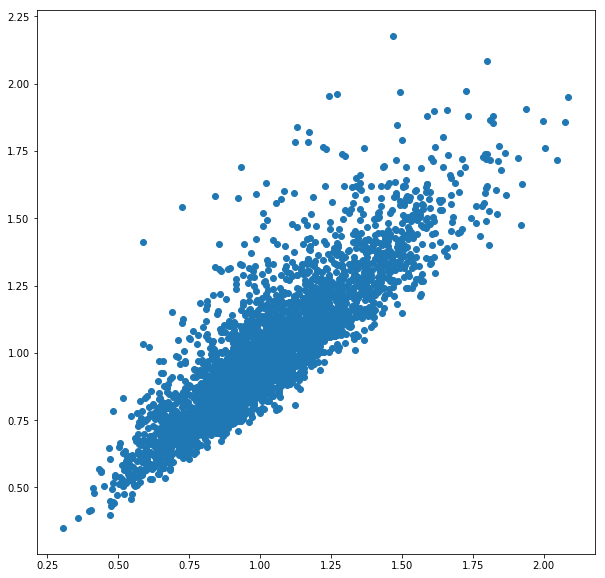

In [17]:
plt.figure(figsize=(10,10))
xxx = [xx[0] for xx in results]
yyy = [xx[1] for xx in results]
plt.scatter(xxx, yyy)

# for i, txt in enumerate(filenames):
#     plt.annotate(txt, (xxx[i], yyy[i]))
    
# plt.show()
# print(mean_energy, sd_energy)
print("Done")

In [ ]:
f0 = calculate_mean_sd_f0(wavs, sr, frame_period=10)

In [ ]:
print(f0)
print(lbr.core.stft(wavs[0]).shape)
print(np.asarray(f0).shape)